In [1]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import seaborn as sns
import pennylane as qml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split





data = pd.read_csv('C:/Users/RDSC/downloads/flc_2013_2022_notime.csv', sep=';')


# Display the first few rows of the dataset to understand its structure
print(data.head())






          open         high          low        close   Volume  Volume MA  \
0  4104.330818  4176.336622  4032.325014  4104.330818  6158668        NaN   
1  4104.330818  4104.330818  3960.319210  4032.325014  4937960        NaN   
2  4032.325014  4104.330818  3960.319210  3960.319210  2287341        NaN   
3  3960.319210  4032.325014  3888.313406  3960.319210  2425496        NaN   
4  3960.319210  3960.319210  3816.307603  3816.307603  3534864        NaN   

   manipulated  
0            0  
1            0  
2            0  
3            0  
4            0  


In [2]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(data)

              open          high           low         close     Volume  \
0      4104.330818   4176.336622   4032.325014   4104.330818    6158668   
1      4104.330818   4104.330818   3960.319210   4032.325014    4937960   
2      4032.325014   4104.330818   3960.319210   3960.319210    2287341   
3      3960.319210   4032.325014   3888.313406   3960.319210    2425496   
4      3960.319210   3960.319210   3816.307603   3816.307603    3534864   
5      3816.307603   3960.319210   3816.307603   3816.307603    4635665   
6      3744.301799   3888.313406   3744.301799   3816.307603    3279290   
7      3816.307603   3960.319210   3816.307603   3960.319210    4027076   
8      3960.319210   3960.319210   3888.313406   3888.313406    3345756   
9      3888.313406   4032.325014   3816.307603   3960.319210    4277737   
10     3960.319210   3960.319210   3816.307603   3888.313406    2750345   
11     3888.313406   3888.313406   3816.307603   3816.307603    3202545   
12     3816.307603   3888

In [3]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Explore the dimensions
print("Number of rows and columns:", df.shape)




Number of rows and columns: (2170, 7)


In [4]:

# Step 3: Preview the data
print("Preview of the data:")
print(df.head())



Preview of the data:
          open         high          low        close   Volume  Volume MA  \
0  4104.330818  4176.336622  4032.325014  4104.330818  6158668        NaN   
1  4104.330818  4104.330818  3960.319210  4032.325014  4937960        NaN   
2  4032.325014  4104.330818  3960.319210  3960.319210  2287341        NaN   
3  3960.319210  4032.325014  3888.313406  3960.319210  2425496        NaN   
4  3960.319210  3960.319210  3816.307603  3816.307603  3534864        NaN   

   manipulated  
0            0  
1            0  
2            0  
3            0  
4            0  


In [5]:
# Step 4: Summary statistics
print("Summary statistics:")
print(df.describe())


Summary statistics:
               open          high           low         close        Volume  \
count   2170.000000   2170.000000   2170.000000   2170.000000  2.170000e+03   
mean    6717.912760   6863.198856   6581.406702   6707.506694  1.364422e+07   
std     2893.535984   2986.828914   2807.352002   2900.443175  1.191747e+07   
min     2480.000000   2650.000000   2430.000000   2480.000000  4.404000e+05   
25%     4702.209521   4820.000000   4609.991323   4699.888816  5.550250e+06   
50%     6090.000000   6192.499129   5992.132667   6070.000000  9.917631e+06   
75%     7863.037552   8012.809696   7704.621009   7863.037552  1.805618e+07   
max    23600.000000  24100.000000  21000.000000  22550.000000  1.549412e+08   

          Volume MA  manipulated  
count  2.151000e+03  2170.000000  
mean   1.367749e+07     0.012903  
std    8.117341e+06     0.112883  
min    2.513635e+06     0.000000  
25%    7.110853e+06     0.000000  
50%    1.173159e+07     0.000000  
75%    1.846937e+07    

In [6]:

# Step 5: Data types
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
open           float64
high           float64
low            float64
close          float64
Volume           int64
Volume MA      float64
manipulated      int64
dtype: object


In [7]:

# Step 6: Target Variable Analysis
target_variable = 'manipulated'  
target_counts = df[target_variable].value_counts()
print("Target variable distribution:")
print(target_counts)

Target variable distribution:
0    2142
1      28
Name: manipulated, dtype: int64


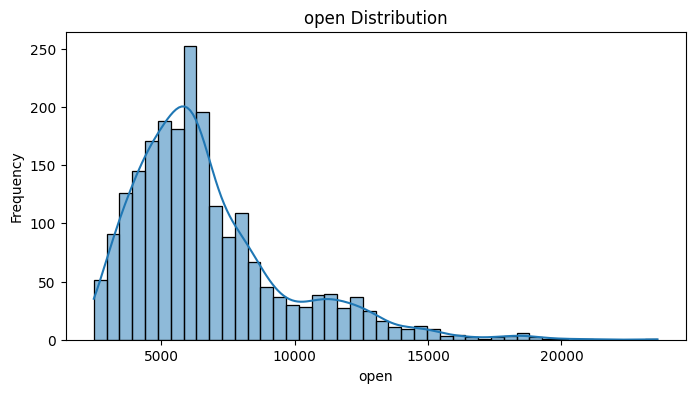

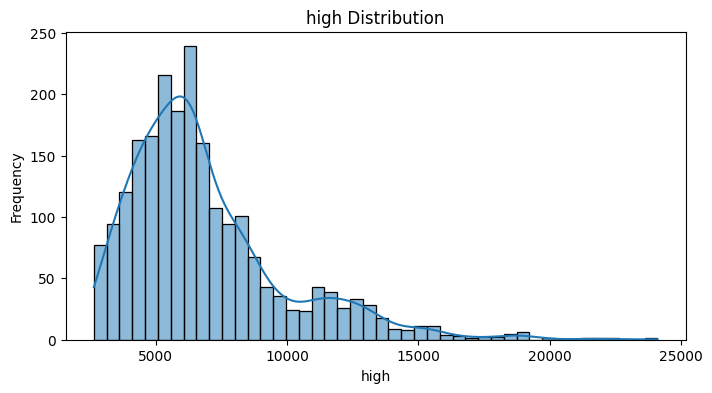

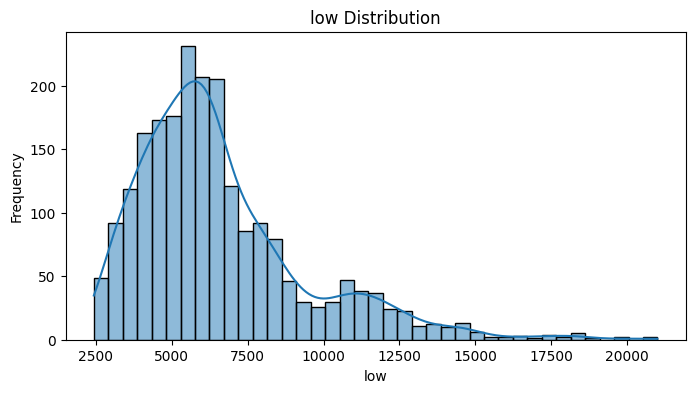

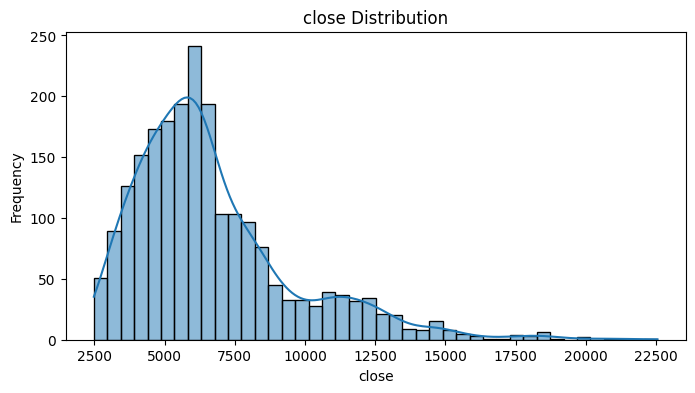

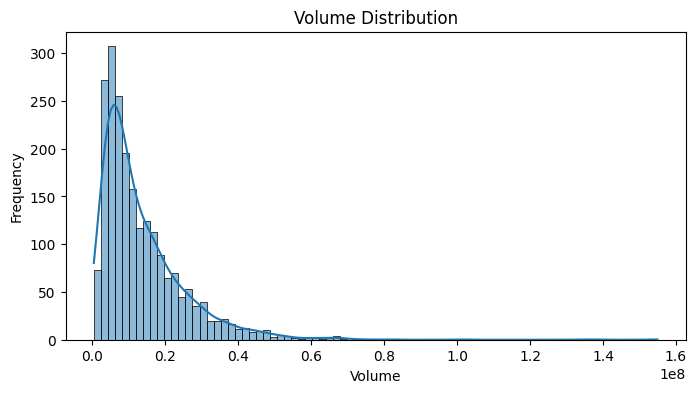

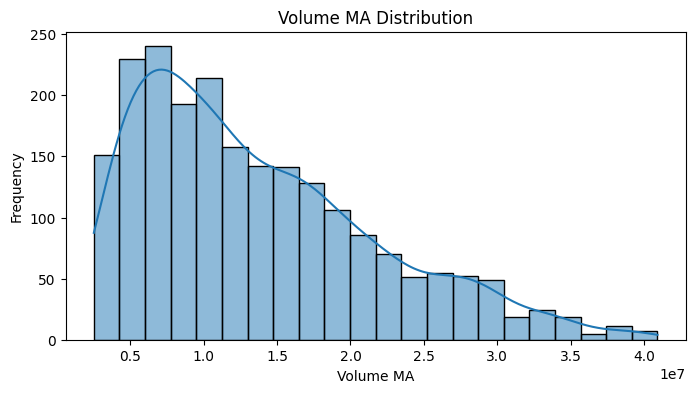

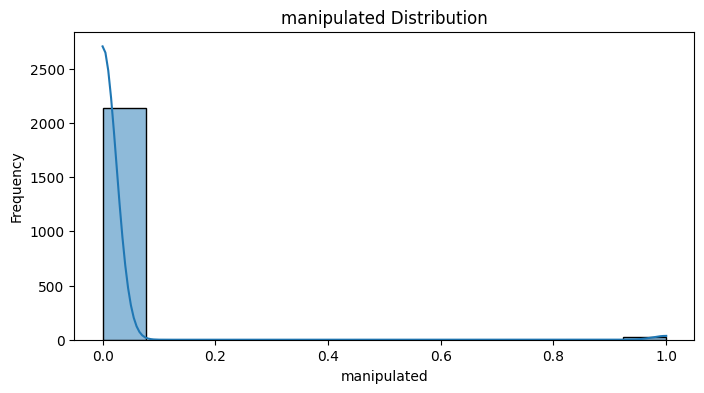

In [8]:

# Step 7: Feature Analysis
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Create histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Create bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature} Counts")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()



In [9]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Handling Missing Values (if any)
# Check for missing values in the DataFrame
print(df.isnull().sum())




open            0
high            0
low             0
close           0
Volume          0
Volume MA      19
manipulated     0
dtype: int64


In [10]:
#If there are any missing values, you can impute them with the mean, median, or mode.
# For example, to impute missing values with the mean:
df.fillna(df.mean(), inplace=True)



In [11]:
# Specify the column for which you want to check outliers
column_name = 'manipulated'  

# Calculate the mean and standard deviation of the column
mean = df[column_name].mean()
std = df[column_name].std()

# Define the threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

# Initialize a list to store outliers
outliers = []

# Calculate the z-score for each value in the column and identify outliers
for index, value in df[column_name].iteritems():
    z_score = (value - mean) / std
    if z_score > threshold:
        outliers.append(value)

print('Outliers in the dataset:', outliers)

Outliers in the dataset: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [12]:
# Step 2: Feature Scaling
# Assuming you want to scale the numerical features (open, high, low, close, Volume, Volume MA)
# Drop the 'manipulated' column as it is the target variable
X = df.drop('manipulated', axis=1)
# Separate out the 'manipulated' column as the target variable
y = df['manipulated']



In [13]:
cases = len(data)
nonfraud_count = len(data[data.manipulated == 0])
fraud_count = len(data[data.manipulated == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Parameters of the data')
print('--------------------------------------------')
print('Total number of cases are', cases)
print('Number of nonfraud_count are', nonfraud_count)
print('Number of fraud_count are',fraud_count)
print('Percentage of fraud cases is' ,fraud_percentage , '%')
print('--------------------------------------------')



nonfraud_cases = data[data.manipulated == 0]
fraud_cases = data[data.manipulated == 1]


Parameters of the data
--------------------------------------------
Total number of cases are 2170
Number of nonfraud_count are 2142
Number of fraud_count are 28
Percentage of fraud cases is 1.31 %
--------------------------------------------


In [14]:
nonfraud_count = data[data.manipulated == 0]
fraud_count = data[data.manipulated == 1]


num_normal = nonfraud_count.shape[0] 
num_fraud = fraud_count.shape[0] 

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")


ratio = num_normal/num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

Number of normal examples = 2142
Number of fraud examples = 28

normal to fraud ratio in the whole data = 76.5


## Undersampling 

In [15]:
# normal_fraud_ratio = 1 means balance sample
normal_fraud_ratio = 1                                     
normal_sample = nonfraud_count.sample(normal_fraud_ratio*num_fraud) 


# The code concatenates the fraud cases from the fraud_count DataFrame and the balanced normal cases from normal_sample to 
# create a new DataFrame called sample. The resulting sample DataFrame now has a balanced class distribution.

sample = pd.concat([fraud_count, normal_sample], axis=0)  

# random shuffling of sample examples 100 times
for i in range(100):
    sample = np.random.permutation(sample)                   

In [16]:
#The variable X contains the feature values from the sample DataFrame, excluding the last column, 
#which contains the class labels (0 or 1).The variable y contains the class labels from the last column of the sample DataFrame.

X, y = sample[:, :-1], sample[:, -1]

# feature scaling
X = MinMaxScaler().fit_transform(X)            

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)


X[:,:] , y[:]


number of examples =  56
number of features =  6


(array([[0.87764138, 0.92569418, 0.99720729, 1.        , 0.222967  ,
         0.65376073],
        [0.01623673, 0.01964257, 0.01752429, 0.0145366 , 0.18226563,
         0.15769299],
        [0.2008801 , 0.2036623 , 0.22120054, 0.20433244, 0.05159262,
         0.1978753 ],
        [1.        , 1.        , 1.        , 0.92776708, 1.        ,
         0.81220481],
        [0.32775174, 0.31757511, 0.35392086, 0.32693191, 0.075269  ,
         0.2050789 ],
        [0.04804997, 0.04409158, 0.0560637 , 0.04910521, 0.02055813,
         0.01810333],
        [0.48119947, 0.49184407, 0.51127558, 0.49694931, 0.26885829,
         1.        ],
        [0.15670442, 0.15051669, 0.17224047, 0.15539079, 0.0544818 ,
         0.14147141],
        [0.75038842, 0.75790684, 0.84360819, 0.80135947, 0.13087889,
         0.5643361 ],
        [0.83114511, 0.87056406, 0.94135307, 0.92518733, 0.29011492,
         0.63283778],
        [0.62068829, 0.63326482, 0.70117993, 0.67753161, 0.15844901,
         0.60905261],

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

(39, 6) (17, 6) (39,) (17,)


## Model Building + Training and evaluation 

Epoch 1/250
4/4 [==============================] - 1s 127ms/step - loss: 0.7053 - accuracy: 0.5806 - val_loss: 0.7582 - val_accuracy: 0.2500
Epoch 2/250
4/4 [==============================] - 0s 21ms/step - loss: 0.7047 - accuracy: 0.5806 - val_loss: 0.7570 - val_accuracy: 0.2500
Epoch 3/250
4/4 [==============================] - 0s 21ms/step - loss: 0.7042 - accuracy: 0.5806 - val_loss: 0.7561 - val_accuracy: 0.2500
Epoch 4/250
4/4 [==============================] - 0s 21ms/step - loss: 0.7037 - accuracy: 0.5806 - val_loss: 0.7554 - val_accuracy: 0.2500
Epoch 5/250
4/4 [==============================] - 0s 21ms/step - loss: 0.7032 - accuracy: 0.5806 - val_loss: 0.7544 - val_accuracy: 0.2500
Epoch 6/250
4/4 [==============================] - 0s 25ms/step - loss: 0.7026 - accuracy: 0.5806 - val_loss: 0.7533 - val_accuracy: 0.2500
Epoch 7/250
4/4 [==============================] - 0s 21ms/step - loss: 0.7022 - accuracy: 0.5806 - val_loss: 0.7521 - val_accuracy: 0.2500
Epoch 8/250
4/4 [==

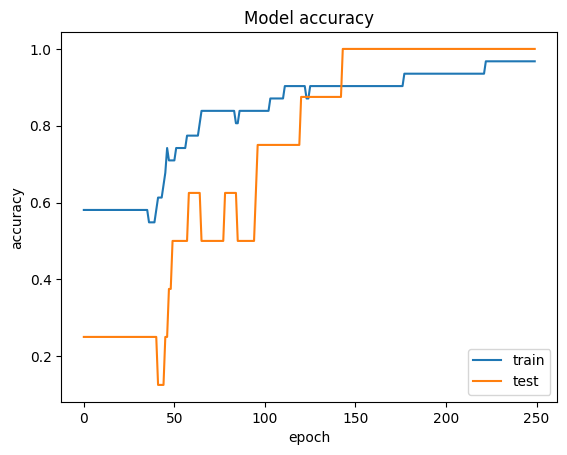

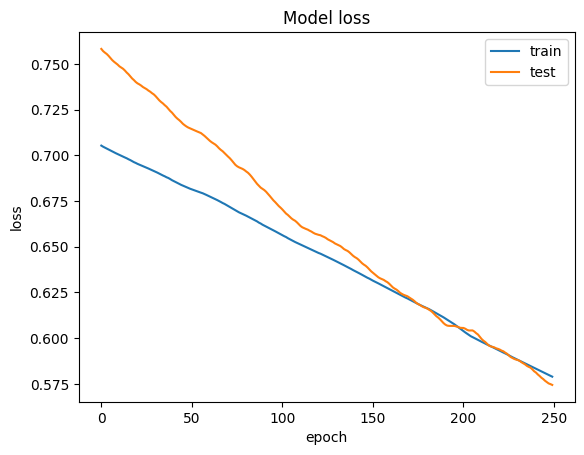

Max val_acc achieved: 100.00 %
Max acc achieved: 96.77 %


In [18]:
num_features = X_train.shape[1]  # Get the number of features from the data



#%% QUANTUM LAYER
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 10
weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)



#%% CLASSICAL LAYERS + INTEGRATION
tf.keras.backend.set_floatx('float64')


model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(num_features,)))
model.add(Dense(units=1, activation='sigmoid'))





# Use Adam optimizer 
opt = Adam(learning_rate=0.0001)
model.compile(opt, loss="binary_crossentropy", metrics=["accuracy"])

# Increase the number of epochs to allow the model to learn more
#history = model.fit(train_data, train_labels, batch_size=10, epochs=100, validation_data=(train_data, train_labels))
#history = model.fit(train_data, train_labels, batch_size=10, epochs= 300, validation_split=0.2)
history = model.fit(X_train, y_train, batch_size= 10, epochs= 250, validation_split=0.2)



#%% EVALUATION
# Plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')


In [19]:
# Evaluate the model on the testing dataset
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(classification_report(y_test, np.round(y_pred)))


1/1 [==============================] - 0s 150ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.82      1.00      0.90         9

    accuracy                           0.88        17
   macro avg       0.91      0.88      0.88        17
weighted avg       0.90      0.88      0.88        17

